In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#the Questions I will try to solve are: How many male and female died in the Titanic? 
#Is equal number or there is a big difference?
#Wich was the average age of the people who died? And the ones who survived?
#Which was the estándar deviation of the average age of death?
#What is the correlation between the Pclass and the survival?


titanic_data = pd.read_csv("/Users/Carmen/Documents/Udacity/python/Data_Analysis_Introduction/Caso_practico_titanic/titanic_data.csv")

#analyse the data on the file
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
#see stadistic of each column
titanic_data.describe()

#CONCLUSION:there is people with no age data, so the analisis by age wont be accurate
#but the mean is 29.7, with a std of 14.5, a min of 0.42 and a max of 80 years old.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
titanic_age=titanic_data.groupby('Age').count()
titanic_age

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Age,,,,,,,,,,,
0.42,1,1,1,1,1,1,1,1,1,0,1
0.67,1,1,1,1,1,1,1,1,1,0,1
0.75,2,2,2,2,2,2,2,2,2,0,2
0.83,2,2,2,2,2,2,2,2,2,0,2
0.92,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
70.00,2,2,2,2,2,2,2,2,2,1,2
70.50,1,1,1,1,1,1,1,1,1,0,1
71.00,2,2,2,2,2,2,2,2,2,1,2


In [31]:
#----Q1 How many male and female died in the Titanic? Is equal number or there is a big difference?----
#getting number of male and female in titanic

titanic_sex=titanic_data.groupby('Sex').groups
titanic_sex

#CONCLUSION:so 314 women and 577 men in the boat

{'female': Int64Index([  1,   2,   3,   8,   9,  10,  11,  14,  15,  18,
             ...
             866, 871, 874, 875, 879, 880, 882, 885, 887, 888],
            dtype='int64', length=314),
 'male': Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  17,  20,
             ...
             873, 876, 877, 878, 881, 883, 884, 886, 889, 890],
            dtype='int64', length=577)}

In [51]:
# titanic_sex stadistic: mean
titanic_sex_dc=titanic_data.groupby('Sex').mean()
titanic_sex_dc

#CONCLUSION:so the mean of the age of the women was 27.9 and for men 30.7, 
#also the mean of the fare payed was higher in women than in men,
#what indicates women were traveling in better conditions. Aso seen in the Pclass mean
#since 3 is a lower class, women had a mean of 2.1 and men of 2.38

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


In [52]:
# titanic_sex stadistic count
titanic_sex_dc=titanic_data.groupby('Sex').count()
titanic_sex_dc

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,,
female,314,314,314,314,261,314,314,314,314,97,312
male,577,577,577,577,453,577,577,577,577,107,577


In [62]:
# titanic_survived stadistic count
titanic_sex_dc=titanic_data.groupby('Survived').count()
titanic_sex_dc

#CONCLUSION: a total of 549 passenger died, and 342 survived. 
#only 68  of the ones who died was in a cabin, again the 136 who survived

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


In [45]:

#grup by variables sex and survived

titanic_sex_survived= titanic_data.groupby(['Sex','Survived']).groups

In [24]:
titanic_sex_survived

{('female',
  0): Int64Index([ 14,  18,  24,  38,  40,  41,  49,  71, 100, 111, 113, 114, 119,
             132, 140, 147, 167, 177, 180, 199, 205, 229, 235, 240, 246, 251,
             254, 264, 276, 293, 297, 312, 357, 362, 374, 396, 402, 404, 409,
             415, 419, 423, 436, 474, 485, 498, 501, 502, 503, 534, 541, 542,
             564, 567, 578, 593, 610, 617, 634, 638, 642, 654, 657, 678, 680,
             702, 729, 736, 767, 772, 792, 799, 807, 813, 816, 852, 854, 863,
             882, 885, 888],
            dtype='int64'),
 ('female',
  1): Int64Index([  1,   2,   3,   8,   9,  10,  11,  15,  19,  22,
             ...
             858, 862, 865, 866, 871, 874, 875, 879, 880, 887],
            dtype='int64', length=233),
 ('male',
  0): Int64Index([  0,   4,   5,   6,   7,  12,  13,  16,  20,  26,
             ...
             872, 873, 876, 877, 878, 881, 883, 884, 886, 890],
            dtype='int64', length=468),
 ('male',
  1): Int64Index([ 17,  21,  23,  36,  55,  65, 

In [55]:
#sex survived count
titanic_sex_survived= titanic_data.groupby(['Sex','Survived']).count()
titanic_sex_survived

#the count show us that 81/314 women died and 468/577 men died, so, proportionally,
#more men than women died
#we also see that between the women who died, only 6 where traveling in cabins, agins the 91
#Women traveling in cabins who survives, again, seens traveling in cabins made more possible to survive
#for men, is the oposite, more traveling in cabins who died that those who survived ¿? 

PassengerId  Pclass  Name  Age  SibSp  Parch  Ticket  Fare  \
Sex    Survived                                                               
female 0                  81      81    81   64     81     81      81    81   
       1                 233     233   233  197    233    233     233   233   
male   0                 468     468   468  360    468    468     468   468   
       1                 109     109   109   93    109    109     109   109   

                 Cabin  Embarked  
Sex    Survived                   
female 0             6        81  
       1            91       231  
male   0            62       468  
       1            45       109

In [42]:
titanic_sex_survived_mean= titanic_data.groupby(['Sex','Survived']).mean()
titanic_sex_survived_mean

#the mean in age show us that is very similar, but bit high in the women who survived, 
#and bit lower in the man who survived.
#alsowe see that the Pclass of survivors is higher than in non survivor, and if you investigate a bit, you will
#see that class 3 was at the botton of the boat, so more difficult to get out

PassengerId    Pclass        Age     SibSp     Parch  \
Sex    Survived                                                         
female 0          434.851852  2.851852  25.046875  1.209877  1.037037   
       1          429.699571  1.918455  28.847716  0.515021  0.515021   
male   0          449.121795  2.476496  31.618056  0.440171  0.207265   
       1          475.724771  2.018349  27.276022  0.385321  0.357798   

                      Fare  
Sex    Survived             
female 0         23.024385  
       1         51.938573  
male   0         21.960993  
       1         40.821484

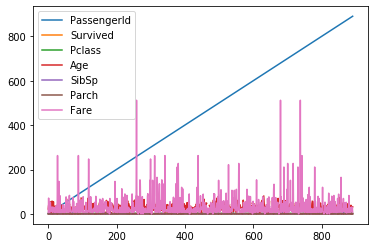

In [74]:
titanic_data.plot()

In [77]:
titanic_plot = titanic_data.groupby(['Sex','Age'], as_index=False).mean()
titanic_plot.head()['Age']

0    0.75
1    1.00
2    2.00
3    3.00
4    4.00
Name: Age, dtype: float64

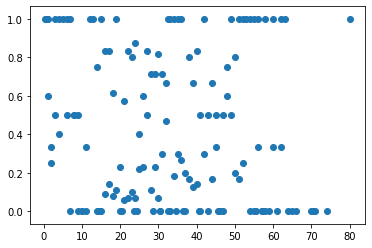

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.scatter(titanic_plot['Age'], titanic_plot['Survived'])

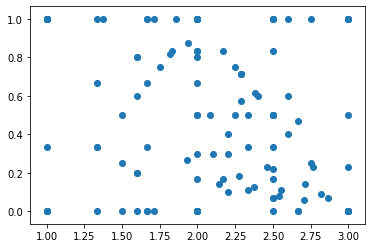

In [83]:
plt.scatter(titanic_plot['Pclass'], titanic_plot['Survived'])